In [3]:
# Import some useful libraries I'll be using


import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import math 

In [4]:
# Difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are 
# completely neglected

# Lasso regression not only helps in reducing over-fitting but it can help us in feature selection

In [5]:
# Load Diabetes 

diabetes = load_diabetes()


In [6]:
# Check the description

print(diabetes.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [7]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [8]:
diabetes_df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930


In [9]:
X = diabetes.data
Y = diabetes.target
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=2509)

In [10]:
print(X_train.shape); print(X_test.shape)

(309, 10)
(133, 10)


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print(X_train_scaled.shape)
print(X_train.min(axis=0))
print(X_train.max(axis=0))
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

(309, 10)
[-0.10722563 -0.04464164 -0.08488624 -0.10895673 -0.12678067 -0.11279473
 -0.09862541 -0.0763945  -0.10436482 -0.13776723]
[0.11072668 0.05068012 0.17055523 0.13204422 0.13327442 0.13146107
 0.17749742 0.15534454 0.13359898 0.13561183]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [14]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [15]:
# Fit linear regression

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Finding the predicted value for training set
# then finding the root of MSE using the predicted label for train label and actual train label
# and then finding the r2 using these two values

pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

54.948994793233354
0.5116873899557304


In [18]:
pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

50.26290171433804
0.5257417722993312


In [19]:
# Finding the r2 for train and test using lasso

In [20]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)


In [21]:
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.3630424396103309
test score:  0.3681791389687713
number of features used:  3


In [22]:
num_coef=np.sum(lasso.coef_!=0)
print(num_coef)
lasso.coef_

3


array([  0.        ,  -0.        , 401.2995465 ,  15.98307812,
         0.        ,   0.        ,  -0.        ,   0.        ,
       288.12978007,   0.        ])

In [23]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [24]:
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

In [25]:
print ("training score for alpha=0.01:", train_score001)
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.5100345217764526
test score for alpha =0.01:  0.5233671462723484
number of features used: for alpha =0.01: 10


In [26]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

In [28]:
print ("training score for alpha=0.0001:", train_score00001)
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.5116870281107654
test score for alpha =0.0001:  0.5257403049466236
number of features used: for alpha =0.0001: 10


In [29]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

In [30]:
print ("LR training score:", lr_train_score)
print ("LR test score: ", lr_test_score)

LR training score: 0.5116873899557304
LR test score:  0.5257417722993312


In [ ]:
# These are just my exercises for a junior data scientist role

In [31]:
from pandas import read_csv

In [32]:
diabetes = read_csv('diabetes.txt', sep = '\t')

In [33]:
print(diabetes)

     GE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6    Y
0    59    2  32.1  101.00  157   93.2  38.0  4.00  4.8598   87  151
1    48    1  21.6   87.00  183  103.2  70.0  3.00  3.8918   69   75
2    72    2  30.5   93.00  156   93.6  41.0  4.00  4.6728   85  141
3    24    1  25.3   84.00  198  131.4  40.0  5.00  4.8903   89  206
4    50    1  23.0  101.00  192  125.4  52.0  4.00  4.2905   80  135
..   ..  ...   ...     ...  ...    ...   ...   ...     ...  ...  ...
437  60    2  28.2  112.00  185  113.8  42.0  4.00  4.9836   93  178
438  47    2  24.9   75.00  225  166.0  42.0  5.00  4.4427  102  104
439  60    2  24.9   99.67  162  106.6  43.0  3.77  4.1271   95  132
440  36    1  30.0   95.00  201  125.2  42.0  4.79  5.1299   85  220
441  36    1  19.6   71.00  250  133.2  97.0  3.00  4.5951   92   57

[442 rows x 11 columns]


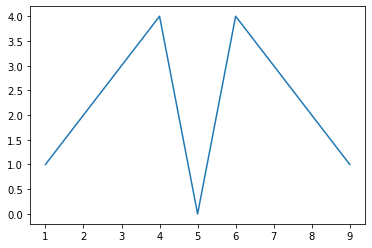

In [36]:
x= range(1,10)
y= [1,2,3,4,0,4,3,2,1]

plt.plot(x,y)

In [40]:
diabetes = read_csv('diabetes.txt', sep = '\t')
diabetes.columns = ['GE','SEX','BMI','BP', 'S1','S2','S3','S4','S5','S6','Y']
GE = diabetes['GE']

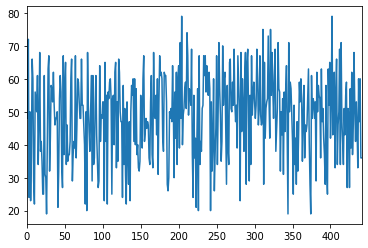

In [42]:
GE.plot()

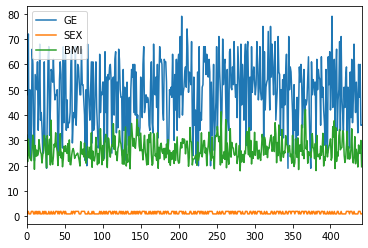

In [43]:
df = diabetes[['GE','SEX','BMI']]
df.plot()

<BarContainer object of 9 artists>

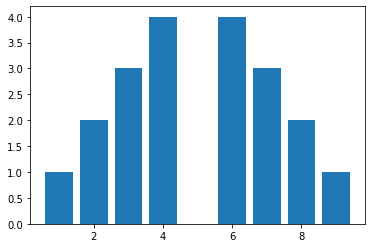

In [44]:
plt.bar(x,y)

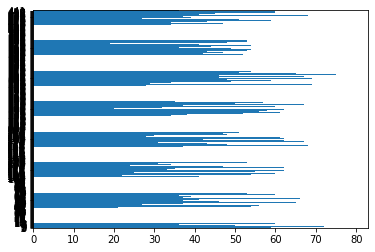

In [47]:
GE.plot(kind="barh")

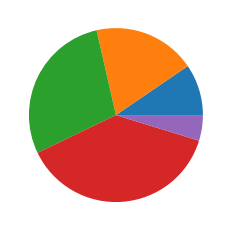

In [48]:
x=[1,2,3,4,0.5]
plt.pie(x)
plt.show()

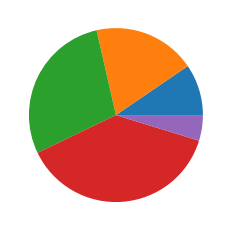

In [49]:
plt.pie(x)
plt.savefig('pie_chart.png')
plt.show()

In [50]:
%pwd

'C:\\Users\\User\\Machine Learning'